# IMPORTANT

**ABOUT INPUT FILES**
- .dat files as outputs from Abaqus
- Name the files as DataNt_X, where:
  - N = ID of experiment ('1'-Principal, '2'-Secondary, '3'-Shear), and
  - X = 'node' (if it comes from a node) or 'element' (if it comes from an element)
  - t = '' if the data is given wrt the loading direction or 't' if the data is given wrt to the transverse direction
- Name the first column (Strain data) as 'X' and the second one (Stress data) as 'Y'

**ABOUT THE COMPUTATION METHOD OF THE SHEAR MODULUS**
- The approach is based on manipulating the data from a test applying an uniaxial loading to a UD lamina oriented with +45º
- Knowing $E_1$, $E_2$, $\nu_{12}$, the applied stress $\sigma_x$ and the resulting strain $\epsilon_x$, $G_{12}$ may be obtained by:
  - $G_{12}=\left[ \frac{(1-2\nu_{12})}{E_1} + \frac{1}{E_1} - \frac{4\epsilon_x}{\sigma_x} \right]^{-1}$
- Here, the process is only performed for data from the selected node

*IMPROVEMENTS TBD*
- Input .dat files such that only two for each experiment is needed (one file with stress + 2 components of strain)
- Add inputs as area section and number of nodes and operate the data from the .dat files -> won't be needed to perform such operations on abaqus anymore
- Add way of computing $G_{12}$ by using data from the element


# COUPON INFORMATION
- Material: IM7/8552
- layup: [0]_8
- Dimensions: 250 x 50 [mm]
- Area dimensions: 50 x 1.2 (0.15/layer) [mm]


# PREPROCESSING

In [ ]:
# PACKAGES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# INPUTS
Header_rows= 0 ## If Abaqus .dat file -> 0
# Dimensions [mm]
a = 50
b = 250
t = 1.2
A = a*t #[mm²]
# FE model info
n = 21 # number of nodes on side where the load is applied

Mounted at /content/drive


# READING DATA

1) Uniaxial test - Principal Axis

In [ ]:
## Data from node
# Loading direction
Path_Data1_node = '/content/drive/MyDrive/Projetos_pessoais/Tese_Polimi/UD_exercise/Data1_node.dat' # Define Path
Data1_node = pd.read_csv(Path_Data1_node,sep='\s+',header=Header_rows)
Data1_node = pd.DataFrame(Data1_node)

Data1_node['X'] = Data1_node['X']/b #Converting displacement to strain
Data1_node['Y'] = Data1_node['Y']*n/A #Converting force to stress
print(Data1_node) #Check if data was read correctly

## Data from element
# Loading direction
Path_Data1_element = '/content/drive/MyDrive/Projetos_pessoais/Tese_Polimi/UD_exercise/Data1_element.dat' # Element data
Data1_element = pd.read_csv(Path_Data1_element,sep='\s+',header=Header_rows)
Data1_element = pd.DataFrame(Data1_element)
print(Data1_element) #Check if data was read correctly
# Transverse direction
Path_Data1t_element = '/content/drive/MyDrive/Projetos_pessoais/Tese_Polimi/UD_exercise/Data1t_element.dat' # Element data
Data1t_element = pd.read_csv(Path_Data1t_element,sep='\s+',header=Header_rows)
Data1t_element = pd.DataFrame(Data1t_element)
print(Data1t_element) #Check if data was read correctly

           X          Y
0   0.000000    0.00000
1   0.000024    3.50000
2   0.000048    7.00000
3   0.000084   12.25000
4   0.000138   20.12500
5   0.000219   31.93750
6   0.000340   49.65625
7   0.000522   76.23420
8   0.000796  116.10165
9   0.001205  175.90230
10  0.001820  265.60345
11  0.002398  350.00000
           X          Y
0   0.000000    0.00000
1   0.000024    3.48781
2   0.000048    6.97562
3   0.000084   12.20730
4   0.000137   20.05490
5   0.000218   31.82620
6   0.000339   49.48330
7   0.000520   75.96880
8   0.000792  115.69700
9   0.001201  175.29000
10  0.001813  264.67800
11  0.002389  348.78100
           X          Y
0   0.000000    0.00000
1  -0.000008    3.48781
2  -0.000015    6.97562
3  -0.000026   12.20730
4  -0.000043   20.05490
5  -0.000069   31.82620
6  -0.000107   49.48330
7  -0.000164   75.96880
8  -0.000250  115.69700
9  -0.000379  175.29000
10 -0.000573  264.67800
11 -0.000755  348.78100


2) Unixial test - Secondary axis

In [ ]:
## Data from node
# Loading direction
Path_Data2_node = '/content/drive/MyDrive/Projetos_pessoais/Tese_Polimi/UD_exercise/Data2_node.dat' # Define Path
Data2_node = pd.read_csv(Path_Data2_node,sep='\s+',header=Header_rows)
Data2_node = pd.DataFrame(Data2_node)

Data2_node['X'] = Data2_node['X']/b #Converting displacement to strain
Data2_node['Y'] = Data2_node['Y']*n/A #Converting force to stress
print(Data2_node) #Check if data was read correctly

## Data from element
# Loading direction
Path_Data2_element = '/content/drive/MyDrive/Projetos_pessoais/Tese_Polimi/UD_exercise/Data2_element.dat' # Element data
Data2_element = pd.read_csv(Path_Data2_element,sep='\s+',header=Header_rows)
Data2_element = pd.DataFrame(Data2_element)
print(Data2_element) #Check if data was read correctly
# Transverse direction
Path_Data2t_element = '/content/drive/MyDrive/Projetos_pessoais/Tese_Polimi/UD_exercise/Data2t_element.dat' # Element data
Data2t_element = pd.read_csv(Path_Data2t_element,sep='\s+',header=Header_rows)
Data2t_element = pd.DataFrame(Data2t_element)
print(Data2t_element) #Check if data was read correctly

           X          Y
0   0.000000    0.00000
1   0.000425    3.50000
2   0.000849    7.00000
3   0.001486   12.25000
4   0.002442   20.12500
5   0.003875   31.93750
6   0.006025   49.65625
7   0.009250   76.23420
8   0.014087  116.10165
9   0.021343  175.90230
10  0.032226  265.60345
11  0.042466  350.00000
           X          Y
0   0.000000    0.00000
1   0.000426    3.49998
2   0.000852    6.99995
3   0.001490   12.24990
4   0.002448   20.12490
5   0.003885   31.93730
6   0.006041   49.65590
7   0.009274   76.23390
8   0.014124  116.10100
9   0.021399  175.90100
10  0.032312  265.60200
11  0.042579  349.99800
           X          Y
0   0.000000    0.00000
1  -0.000008    3.49998
2  -0.000015    6.99995
3  -0.000027   12.24990
4  -0.000044   20.12490
5  -0.000070   31.93730
6  -0.000109   49.65590
7  -0.000167   76.23390
8  -0.000254  116.10100
9  -0.000386  175.90100
10 -0.000582  265.60200
11 -0.000767  349.99800


3) Shear Stress



In [ ]:
## Data from node
Path_Data3_node = '/content/drive/MyDrive/Projetos_pessoais/Tese_Polimi/UD_exercise/Data3_node.dat' # Define Path
Data3_node = pd.read_csv(Path_Data3_node,sep='\s+',header=Header_rows)
Data3_node = pd.DataFrame(Data3_node)

Data3_node['X'] = Data3_node['X']/b #Converting displacement to strain
Data3_node['Y'] = Data3_node['Y']*n/A #Converting force to stress
print(Data3_node) #Check if data was read correctly

## Data from element - not implemented yet
#Path_Data3_element = '/content/drive/MyDrive/Projetos_pessoais/Tese_Polimi/UD_exercise/Data3_element.dat' # Element data
#Data3_element = pd.read_csv(Path_Data3_element,sep='\s+',header=Header_rows)
#Data3_element = pd.DataFrame(Data3_element)
#print(Data3_element) #Check if data was read correctly

           X          Y
0   0.000000    0.00000
1   0.000301    3.50000
2   0.000601    7.00000
3   0.001052   12.25000
4   0.001728   20.12500
5   0.002743   31.93750
6   0.004265   49.65625
7   0.006548   76.23420
8   0.009972  116.10165
9   0.015108  175.90230
10  0.022812  265.60345
11  0.030061  350.00000


# PLOTS

1) Uniaxial test - Principal Axis

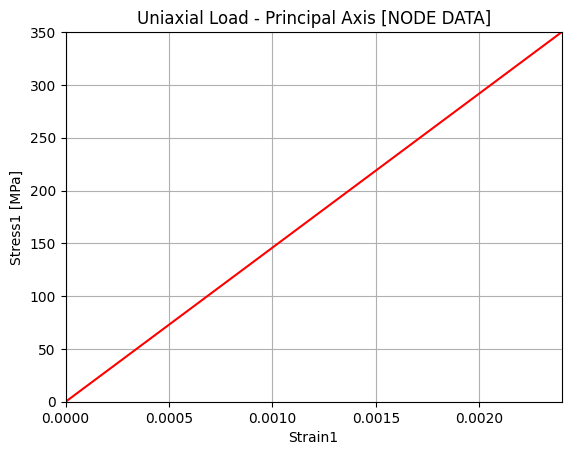

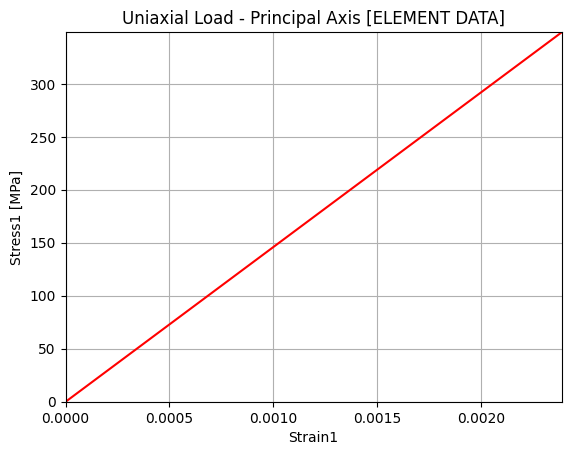

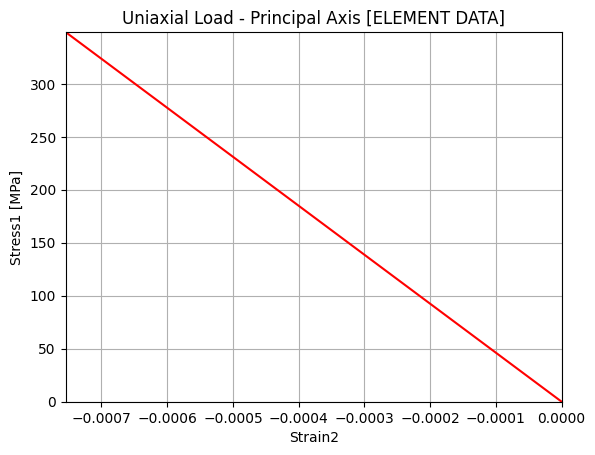

In [ ]:
### Ploting results

## Node
# Loading Direction
Strain1_node = Data1_node['X']
Stress1_node = Data1_node['Y']
plt.plot(Strain1_node, Stress1_node,'r')
plt.xlim([Data1_node['X'].min(), Data1_node['X'].max()])
plt.ylim([Data1_node['Y'].min(), Data1_node['Y'].max()])
plt.grid()
plt.title("Uniaxial Load - Principal Axis [NODE DATA]")
plt.xlabel("Strain1")
plt.ylabel("Stress1 [MPa]")
plt.show()

## Element
# Loading Direction
Strain1_element = Data1_element['X']
Stress1_element = Data1_element['Y']
plt.plot(Strain1_node, Stress1_node,'r')
plt.xlim([Data1_element['X'].min(), Data1_element['X'].max()])
plt.ylim([Data1_element['Y'].min(), Data1_element['Y'].max()])
plt.grid()
plt.title("Uniaxial Load - Principal Axis [ELEMENT DATA]")
plt.xlabel("Strain1")
plt.ylabel("Stress1 [MPa]")
plt.show()
# Transverse Direction
Strain1t_element = Data1t_element['X']
Stress1t_element = Data1t_element['Y']
plt.plot(Strain1t_element, Stress1t_element,'r')
plt.xlim([Data1t_element['X'].min(), Data1t_element['X'].max()])
plt.ylim([Data1t_element['Y'].min(), Data1t_element['Y'].max()])
plt.grid()
plt.title("Uniaxial Load - Principal Axis [ELEMENT DATA]")
plt.xlabel("Strain2")
plt.ylabel("Stress1 [MPa]")
plt.show()

2) Unixial test - Secondary axis

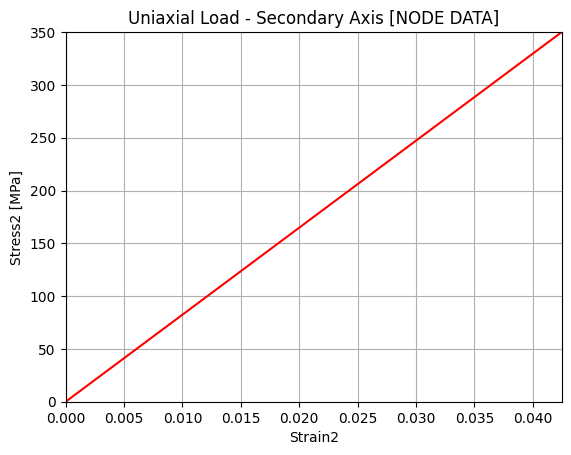

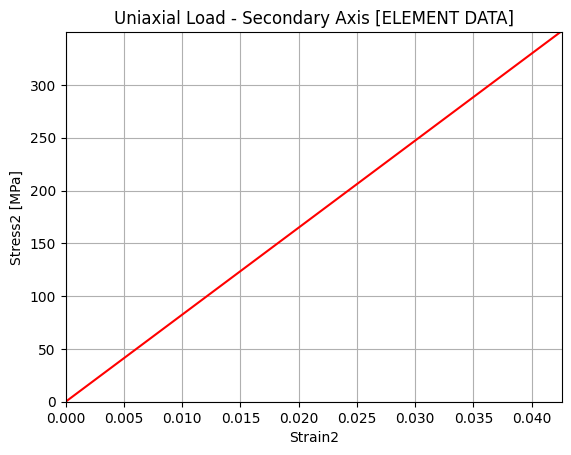

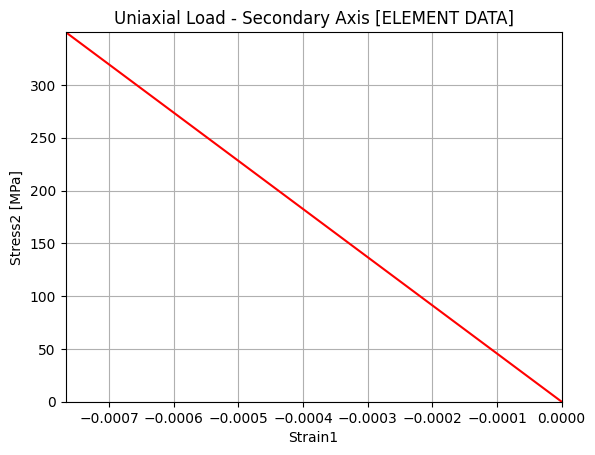

In [ ]:
## Ploting results

## Node
# Loading Direction
Strain2_node = Data2_node['X']
Stress2_node = Data2_node['Y']
plt.plot(Strain2_node, Stress2_node,'r')
plt.xlim([Data2_node['X'].min(), Data2_node['X'].max()])
plt.ylim([Data2_node['Y'].min(), Data2_node['Y'].max()])
plt.grid()
plt.title("Uniaxial Load - Secondary Axis [NODE DATA]")
plt.xlabel("Strain2")
plt.ylabel("Stress2 [MPa]")
plt.show()

## Element
# Loading Direction
Strain2_element = Data2_element['X']
Stress2_element = Data2_element['Y']
plt.plot(Strain2_node, Stress2_node,'r')
plt.xlim([Data2_element['X'].min(), Data2_element['X'].max()])
plt.ylim([Data2_element['Y'].min(), Data2_element['Y'].max()])
plt.grid()
plt.title("Uniaxial Load - Secondary Axis [ELEMENT DATA]")
plt.xlabel("Strain2")
plt.ylabel("Stress2 [MPa]")
plt.show()
# Transverse Direction
Strain2t_element = Data2t_element['X']
Stress2t_element = Data2t_element['Y']
plt.plot(Strain2t_element, Stress2t_element,'r')
plt.xlim([Data2t_element['X'].min(), Data2t_element['X'].max()])
plt.ylim([Data2t_element['Y'].min(), Data2t_element['Y'].max()])
plt.grid()
plt.title("Uniaxial Load - Secondary Axis [ELEMENT DATA]")
plt.xlabel("Strain1")
plt.ylabel("Stress2 [MPa]")
plt.show()

3) Shear Test

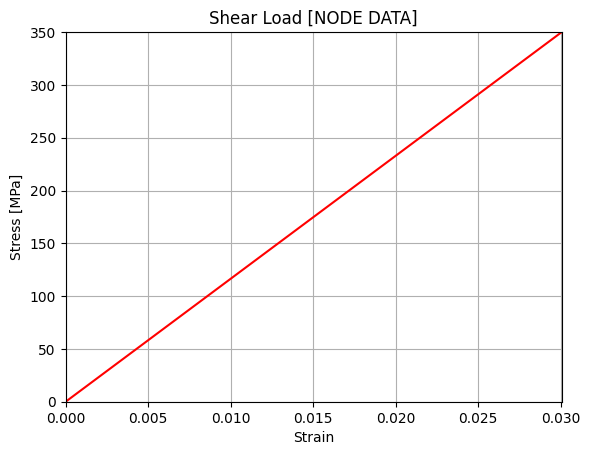

In [ ]:
## Ploting results
# Node
Strain3_node = Data3_node['X']
Stress3_node = Data3_node['Y']
plt.plot(Strain3_node, Stress3_node,'r')
plt.xlim([Data3_node['X'].min(), Data3_node['X'].max()])
plt.ylim([Data3_node['Y'].min(), Data3_node['Y'].max()])
plt.grid()
plt.title("Shear Load [NODE DATA]")
plt.xlabel("Strain")
plt.ylabel("Stress [MPa]")
plt.show()

# Element - not implemented yet
#Strain3_element = Data3_element['X']
#Stress3_element = Data3_element['Y']
#plt.plot(Strain3_element, Stress3_element,'r')
#plt.xlim([Data3_element['X'].min(), Data3_element['X'].max()])
#plt.ylim([Data3_element['Y'].min(), Data3_element['Y'].max()])
#plt.grid()
#plt.title("Shear Load [NODE DATA]")
#plt.xlabel("Strain")
#plt.ylabel("Stress [MPa]")
#plt.show()

# COMPUTUING THE ENGINEERING COEFFICIENTS

1) PRINCIPAL YOUNG MODULUS [E1]

In [ ]:
## NODE
interp1_node = Data1_node.interpolate(method='linear')
rows1_node = len(interp1_node)
E1_node = interp1_node.iloc[rows1_node-2,1]/interp1_node.iloc[rows1_node-2,0]
print('Young Modulus (Node) =', E1_node, 'MPa')

## ELEMENT
interp1_element = Data1_element.interpolate(method='linear')
rows1_element = len(interp1_element)
E1_element = interp1_element.iloc[rows1_element-2,1]/interp1_element.iloc[rows1_element-2,0]
print('Young Modulus (Element) =', E1_element, 'MPa')

Young Modulus (Node) = 145928.5849286739 MPa
Young Modulus (Element) = 146010.7131233002 MPa


2) SECONDARY YOUNG MODULUS [E2]

In [ ]:
## NODE
interp2_node = Data2_node.interpolate(method='linear')
rows2_node = len(interp2_node)
E2_node = interp2_node.iloc[rows2_node-2,1]/interp2_node.iloc[rows2_node-2,0]
print('Young Modulus (Node) =', E2_node, 'MPa')

## ELEMENT
interp2_element = Data2_element.interpolate(method='linear')
rows2_element = len(interp2_element)
E2_element = interp2_element.iloc[rows2_element-2,1]/interp2_element.iloc[rows2_element-2,0]
print('Young Modulus (Element) =', E2_element, 'MPa')

Young Modulus (Node) = 8241.797098031428 MPa
Young Modulus (Element) = 8219.994614953715 MPa


4) Poisson modulus nu12

In [ ]:
## ELEMENT
interp1t_element = Data1t_element.interpolate(method='linear')
rows1t_element = len(interp1t_element)
nu12_element = -E1_element*interp1t_element.iloc[rows1t_element-2,0]/interp1t_element.iloc[rows1t_element-2,1]
print('Poisson Modulus (Element) =', nu12_element)

Poisson Modulus (Element) = 0.3158589530707827


5) Poisson modulus nu21

In [ ]:
## ELEMENT
interp2t_element = Data2t_element.interpolate(method='linear')
rows2t_element = len(interp2t_element)
nu21_element = -E2_element*interp2t_element.iloc[rows2t_element-2,0]/interp2t_element.iloc[rows2t_element-2,1]
print('Poisson Modulus (Element) =', nu21_element)

Poisson Modulus (Element) = 0.01801780779098593


3) COMPUTING THE SHEAR MODULUS [G12]

In [ ]:
## NODE
interp3_node = Data3_node.interpolate(method='linear')
rows3_node = len(interp3_node)
eps_x = interp3_node.iloc[rows3_node-2,0]
sigma_x = interp3_node.iloc[rows3_node-2,1]
G12_node = -1/(((1-2*nu12_element)/(E1_node))+(1/E2_node)-4*(eps_x/sigma_x))
print('Shear Modulus (Node) =', G12_node, 'MPa')

## ELEMENT - not implemented yet
#interp3_element = Data3_element.interpolate(method='linear')
#rows3_element = len(interp3_element)
#G12_element = interp3_element.iloc[rows3_element-2,1]/interp3_element.iloc[rows3_element-2,0]
#print('Young Modulus (Element) =', G12_element, 'MPa')

Shear Modulus (Node) = 4551.763171491675 MPa


# COMPARISON BETWEEN RESULTS - STOP


The inserted material data was E = 71.7 GPa

Comparing with both results, we get:

In [ ]:
#E = 71.7
# Comparing with Node data
#error_node = abs(100*((E_node/E)-1))

# Comparing with Element data
#error_element = abs(100*((E_element/E)-1))

#print('The error of the Young Modulus obtained with data from node is of', error_node,'%')
#print('The error of the Young Modulus obtained with data from element is of', error_element,'%')

The error of the Young Modulus obtained with data from node is of 0.4554499564622061 %
The error of the Young Modulus obtained with data from element is of 0.0001445766293350914 %
